This program uses Bollinger Bands to determine buy/sell signals. Bollinger Bands are a measure of standard deviation.

Reference: https://www.youtube.com/watch?v=gEIw2iUlFYc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('BTC-USD.csv')
df = df.set_index(pd.DatetimeIndex(df.Date))
df

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10
...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10


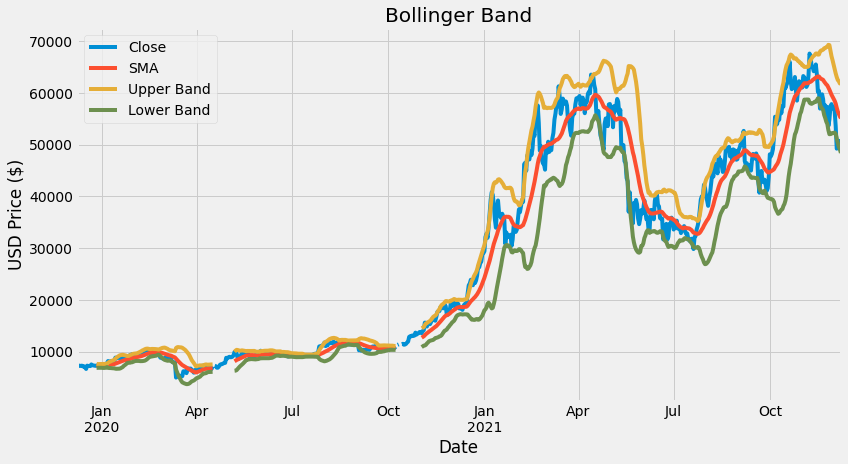

In [3]:
period = 20

# Calculate simple moving average
df['SMA'] = df['Close'].rolling(window=period).mean()
# Calculate standard deviation
df['SD'] = df['Close'].rolling(window=period).std()
# Calculate upper and lower Bollinger band
df['Upper Band'] = df['SMA'] + (df['SD'] * 2)
df['Lower Band'] = df['SMA'] - (df['SD'] * 2)

# Create a list of columns
column_list = ['Close', 'SMA', 'Upper Band', 'Lower Band']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Bollinger Band')
plt.ylabel('USD Price ($)')
plt.show()


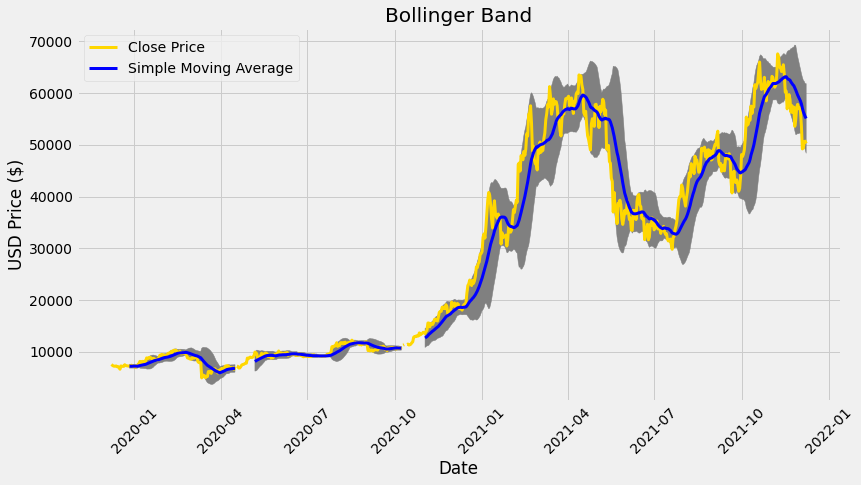

In [4]:
# Plot and shade area between bollinger bands grey
fig = plt.figure(figsize=(12.2, 6.4))
# Add subplot
ax = fig.add_subplot(1, 1, 1)
# Get index values of data frame
x_axis = df.index
ax.fill_between(x_axis, df['Upper Band'], df['Lower Band'], color='grey')
ax.plot(x_axis, df['Close'], color='gold', lw=3, label='Close Price')
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label='Simple Moving Average')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend(loc='upper left')
plt.show()

In [5]:
# # Create data frame for
# df = df[period - 1:]
# df

In [6]:
# Determine signals, Close > Upper Band (bearish). Close < Lower Band (bullish)
def buy_sell_signal(data):
    buy_signal = []
    sell_signal = []
    
    for i in range(len(data)):
        if data['Close'][i] > data['Upper Band'][i]:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['Close'][i] < data['Lower Band'][i]:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)    

In [7]:
# Create new columns
signals = buy_sell_signal(df)
df['Buy_Signal_Price'] = signals[0]
df['Sell_Signal_Price'] = signals[1]
df

,Date,Open,High,Low,Close,Volume,SMA,SD,Upper Band,Lower Band,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,,
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10,57097.093555,2965.429548,63027.952651,51166.234459,49200.703125,NaN
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10,56387.642383,3034.879644,62457.401671,50317.883095,49368.847656,NaN
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10,55908.711328,3161.195954,62231.103237,49586.319420,NaN,NaN


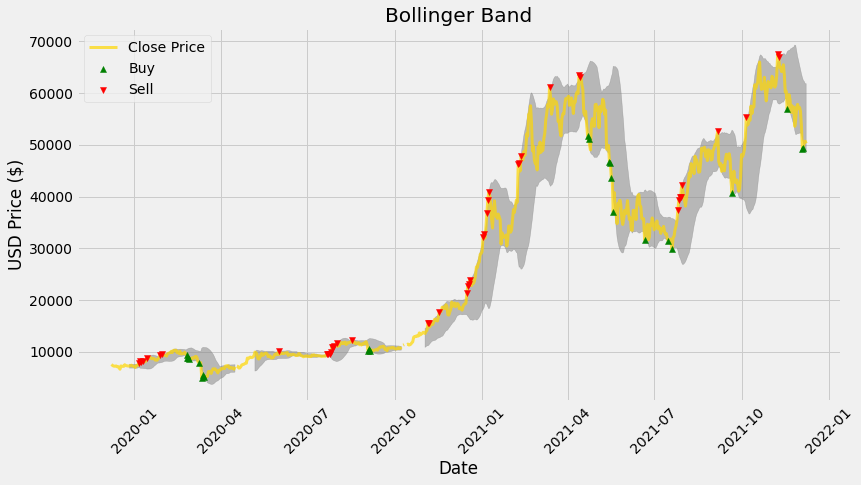

In [9]:
# Add subplot and set axis
fig = plt.figure(figsize=(12.2, 6.4))
ax = fig.add_subplot(1, 1, 1)
x_axis = df.index
# Plot shaded area between bollinger bands, buy sell signal price and, close price
ax.fill_between(x_axis, df['Upper Band'], df['Lower Band'], color='grey', alpha=0.5)
ax.plot(x_axis, df['Close'], lw=3, label='Close Price', color ='gold', alpha=0.7)
ax.scatter(x_axis, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1, zorder=10)
ax.scatter(x_axis, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1, zorder=10)
# Additional labels
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.show()

In [13]:
# Tabulate percentage gains
def tabuatePercentageGains(data):
    openPosition = False
    startingSum = 100
    quantityHeld = 0
    buyingPrice = 0
    for i in range(0, len(data.index)):
        buyPrice = data['Buy_Signal_Price'][i]
        sellPrice = data['Sell_Signal_Price'][i]
        if(not openPosition and not np.isnan(buyPrice)):
            quantityHeld = startingSum/buyPrice
            openPosition = True
            buyingPrice = buyPrice
            print(f"Buy at {buyPrice} USD")
        if(openPosition and not np.isnan(sellPrice)):
            startingSum = sellPrice * quantityHeld
            quantityHeld = 0
            openPosition = False
            print(f"Sell at {sellPrice} USD, portfolio:{startingSum}")
    
    if(openPosition):
        # Assume last open position was not taken since no selling price
        startingSum = quantityHeld * buyingPrice
        print(f"No selling price available, position at {buyingPrice} USD voided")
        
    percentageChange = startingSum - 100
    return percentageChange

percentageGained = tabuatePercentageGains(df)
print(f'Net Gain: {percentageGained}%')

Buy at 9341.705078 USD
Sell at 10167.268555 USD, portfolio:108.83739606535242
Buy at 10245.296875 USD
Sell at 15579.848633 USD, portfolio:165.5071763167488
Buy at 51762.273438 USD
Sell at 37337.535156 USD, portfolio:119.38482612628594
Buy at 40693.675781 USD
Sell at 55361.449219 USD, portfolio:162.4163180706186
Buy at 56942.136719 USD
No selling price available, position at 56942.136719 USD voided
Net Gain: 62.41631807061859%


In [14]:
# Compare to buy and hold
def buyAndHold(data):
    buyAt = data['Close'][0]
    sellAt = data['Close'][len(data.index)-1]
    return (sellAt - buyAt) * 100 / (buyAt)

performance = 100 * (percentageGained - buyAndHold(df)) / buyAndHold(df)
print(f'StochRSI outperform buy and hold by: {np.round(performance,3)}%')

StochRSI outperform buy and hold by: -89.414%


Closing thoughts: Bollinger Bands alone does not provide good buy sell signals, significantly underperform buy hold strategy likely because it is unable to ride trends. Large price movement will give false signals.